In [46]:
import ogs
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

In [47]:
model=ogs.OGS(INPUT_FILE="triax_original.prj", PROJECT_FILE="triax_original.prj", ogs_mode="silent")

In [58]:
betas = np.linspace(0,np.pi/2,45)

In [63]:
UCS = np.array([])
pts = {"pt0": (0.0,0.0,0.0)}

for i in betas:
    angle = int(np.round(i*180/np.pi,0))
    #print("Generating input for %i °" %angle)
    ofile="triax_" + str(angle) + ".prj"
    model = ogs.OGS(INPUT_FILE="triax_original.prj", PROJECT_FILE=ofile)
    model.replaceTxt('%.12f %.12f' %(np.cos(i),np.sin(i)), xpath="./parameters/parameter/values", occurance=0)
    model.replaceTxt('%.12f %.12f' %(-np.sin(i),np.cos(i)), xpath="./parameters/parameter/values", occurance=1)
    model.writeInput()
    #
    #print("Running simulation")
    model.runModel(path='~/ogs_release/bin')
    #
    #print("Getting results")
    pvd = vtuIO.PVDIO(".", "triax_0.pvd", dim=2)
    results = {}
    results["AxialStress"] = pvd.readTimeSeries("sigma", pts=pts)
    ucs = np.array(results['AxialStress']['pt0']).T[1][-1]
    UCS = np.append(UCS,-ucs)
    #print("Removing created input")
    !rm $ofile

OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
OGS finished
./triax_0.pvd
O

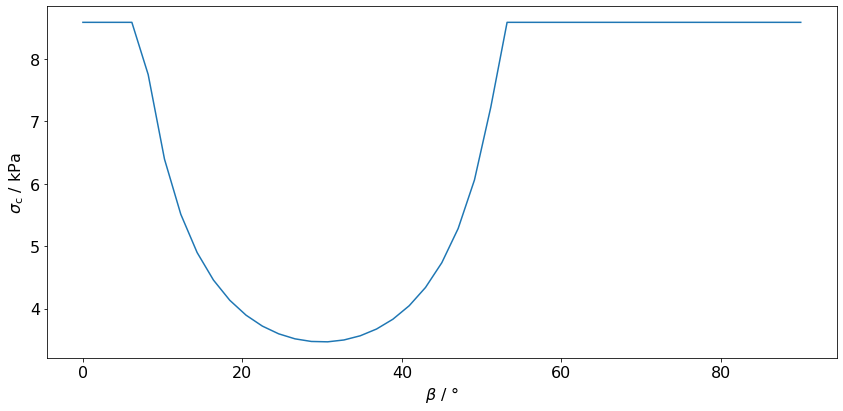

In [60]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.rad2deg(betas),UCS/1.e3)
ax.set_xlabel('$\\beta$ / °')
ax.set_ylabel('$\\sigma_\\mathrm{c}$ / kPa')
fig.tight_layout();